In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = sns.load_dataset("iris")


print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
#feature datatypes
print("Feature and their types")
df.dtypes

Feature and their types


,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


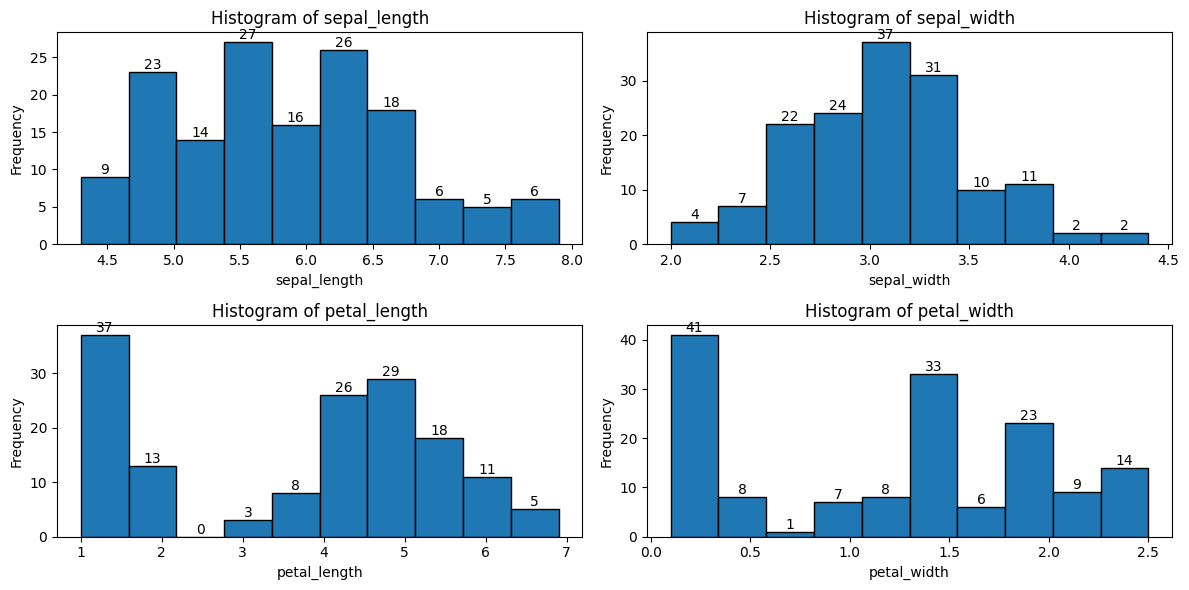

In [7]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)

    ax = plt.hist(df[column], edgecolor="black")
    plt.gca().bar_label(plt.gca().containers[0], fmt='%d')  # Add count labels
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

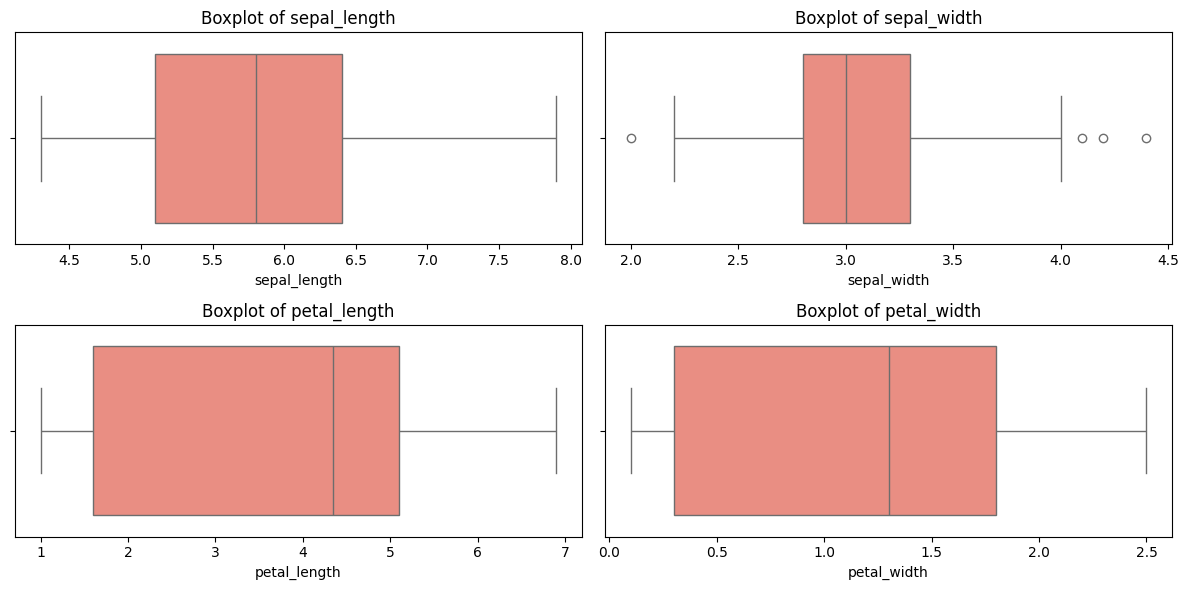

In [8]:
# --- Boxplots for Each Feature ---
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    ax = plt.subplot(2, 2, i + 1)
    # Create boxplot and store it in a container
    box_container = sns.boxplot(x=df[column], ax=ax, color='salmon')
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [10]:
for column in df.columns[:-1]:  # Exclude 'species' column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers first
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"\nFeature: {column}")
    print(f"  Mean: {df[column].mean():.2f}, Median: {df[column].median():.2f}, Std Dev: {df[column].std():.2f}")
    print(f"  Outliers Detected: {'Yes' if not outliers.empty else 'No'}")
    if not outliers.empty:
        print(f"  Outlier Values: {outliers.tolist()}")
    print("-" * 40)

    # Now replace outliers if needed
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)



Feature: sepal_length
  Mean: 5.84, Median: 5.80, Std Dev: 0.83
  Outliers Detected: No
----------------------------------------

Feature: sepal_width
  Mean: 3.06, Median: 3.00, Std Dev: 0.44
  Outliers Detected: Yes
  Outlier Values: [4.4, 4.1, 4.2, 2.0]
----------------------------------------

Feature: petal_length
  Mean: 3.76, Median: 4.35, Std Dev: 1.77
  Outliers Detected: No
----------------------------------------

Feature: petal_width
  Mean: 1.20, Median: 1.30, Std Dev: 0.76
  Outliers Detected: No
----------------------------------------


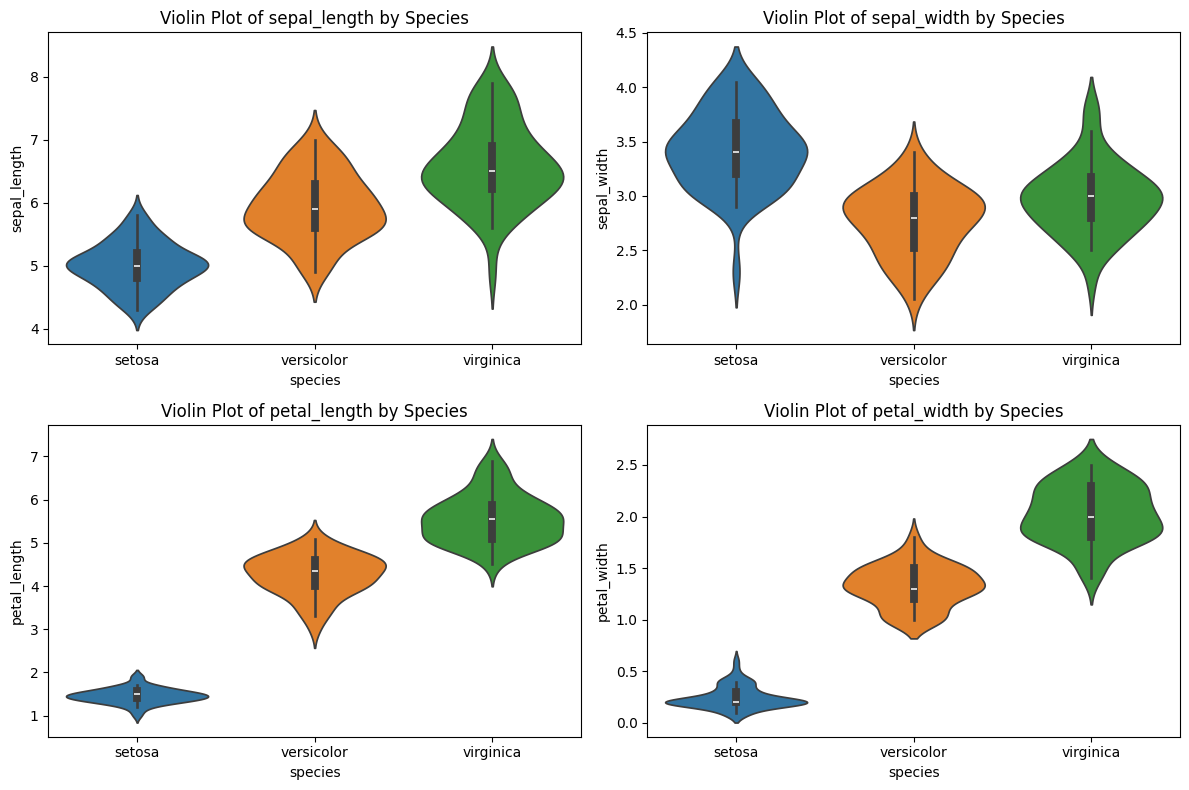

In [12]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df["species"], y=df[column], hue=df['species'])
    plt.title(f"Violin Plot of {column} by Species")

plt.tight_layout()
plt.show()

